#### Time series task for prospective DTSE AIS data scientists

You have the following data available: 

- Macroeconomic Data for 1959Q1 - 2009Q3
- realgdp: Real gross domestic product (Bil. of chained 2005 US dollars, seasonally adjusted annual rate)
- pop: End of the quarter total population, all ages (in millions)
- unemp: Seasonally adjusted unemployment rate (in %)
- infl: Inflation rate (in %)

##### Objectives

Using  only the data provided:

1) Forecast the quarterly unemployment rate until and including Q4 2013. The other available variables may or may not be used for the purposes of the forecast - that's up to you

2) Predict how many people will be unemployed in 2013. For the purposes of this subtask, 65% of the population is considered to be in the labor force at all times

- Describe and explain any exploratory steps you are taking
- Put the biggest emphasis on the modeling part and explain your thought process and decisions taken
- During modeling, you should try and compare at least two different models and try different parameters for the models of your choice, if applicable 
- Explain your model selection process and how you arrived at your final model choice
- Summarize your final forecasts verbally, as if you would explain your results to a non-technical colleague

Use this Jupyter notebook to show your work. After you're done, send either the .ipynb file, an HTML export, or a link to your personal repository. 

#### Importing necessary libraries

In [124]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

##### Reading the dataset

In [200]:
df = pd.read_csv("DTSE_AIS_unemployment_task_data.csv")
df.head()

,Period,realgdp,pop,unemp,infl
0,1959-01-01,2710.349,177.146,5.8,0.00
1,1959-04-01,2778.801,177.830,5.1,2.34
2,1959-07-01,2775.488,178.657,5.3,2.74
3,1959-10-01,2785.204,179.386,5.6,0.27
4,1960-01-01,2847.699,180.007,5.2,2.31


In [126]:
## changing to dateTime to sort by


df['Period'] = pd.to_datetime(df['Period'], format = '%Y-%m-%d')

In [127]:
## Making Month as index

df.set_index('Period', inplace=True)
df.head()

,realgdp,pop,unemp,infl
Period,,,,
1959-01-01,2710.349,177.146,5.8,0.00
1959-04-01,2778.801,177.830,5.1,2.34
1959-07-01,2775.488,178.657,5.3,2.74
1959-10-01,2785.204,179.386,5.6,0.27
1960-01-01,2847.699,180.007,5.2,2.31


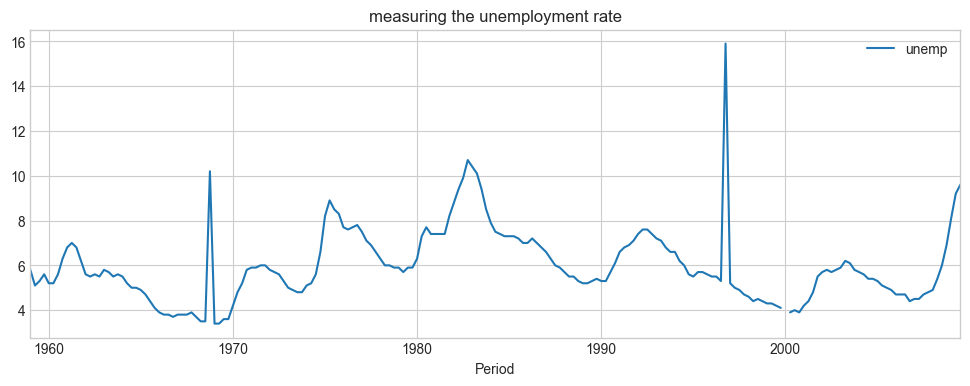

In [128]:
## Plotting the curve

plt.style.use('seaborn-whitegrid')
df['unemp'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('measuring the unemployment rate')
plt.show(block=False)

Let's impute the missing value in 2000 by interpolating the function

In [129]:
df=df.interpolate()

### Time series Decomposition

##### Additive Seasonal Decomposition

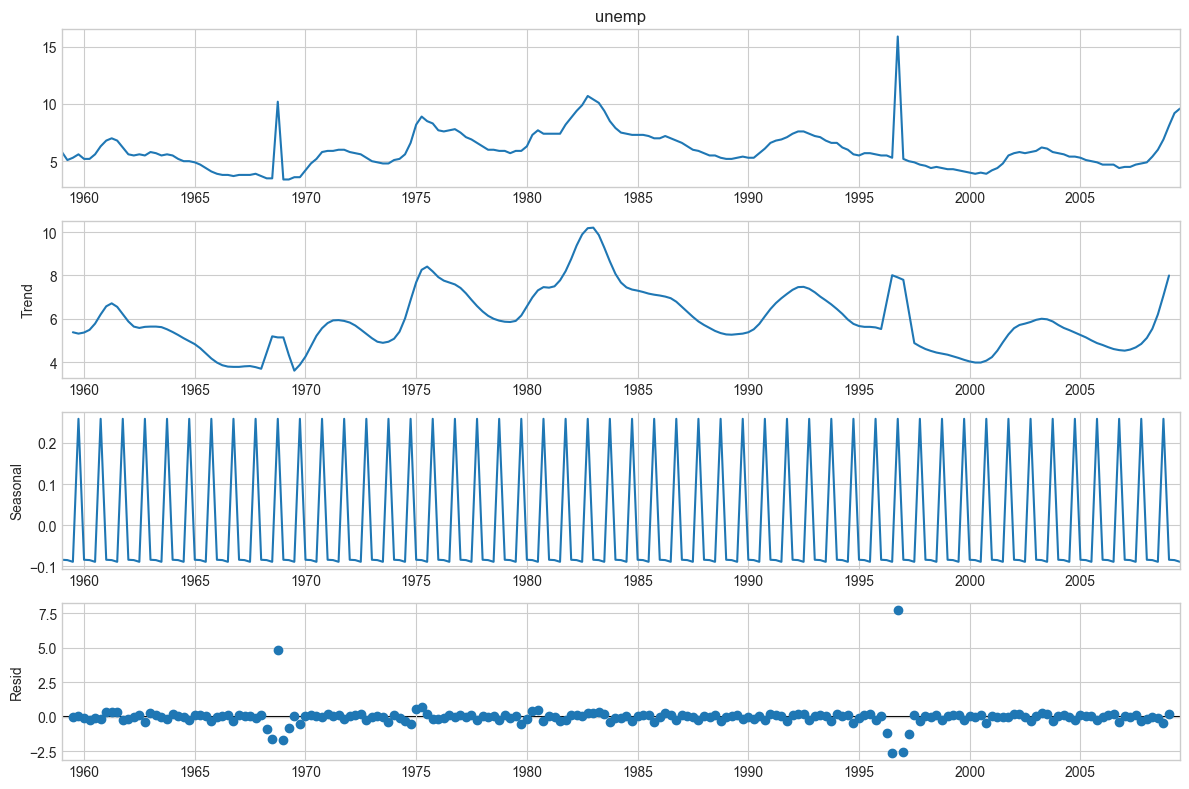

In [130]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df.unemp, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

##### Multiplicative Seasonal Decomposition

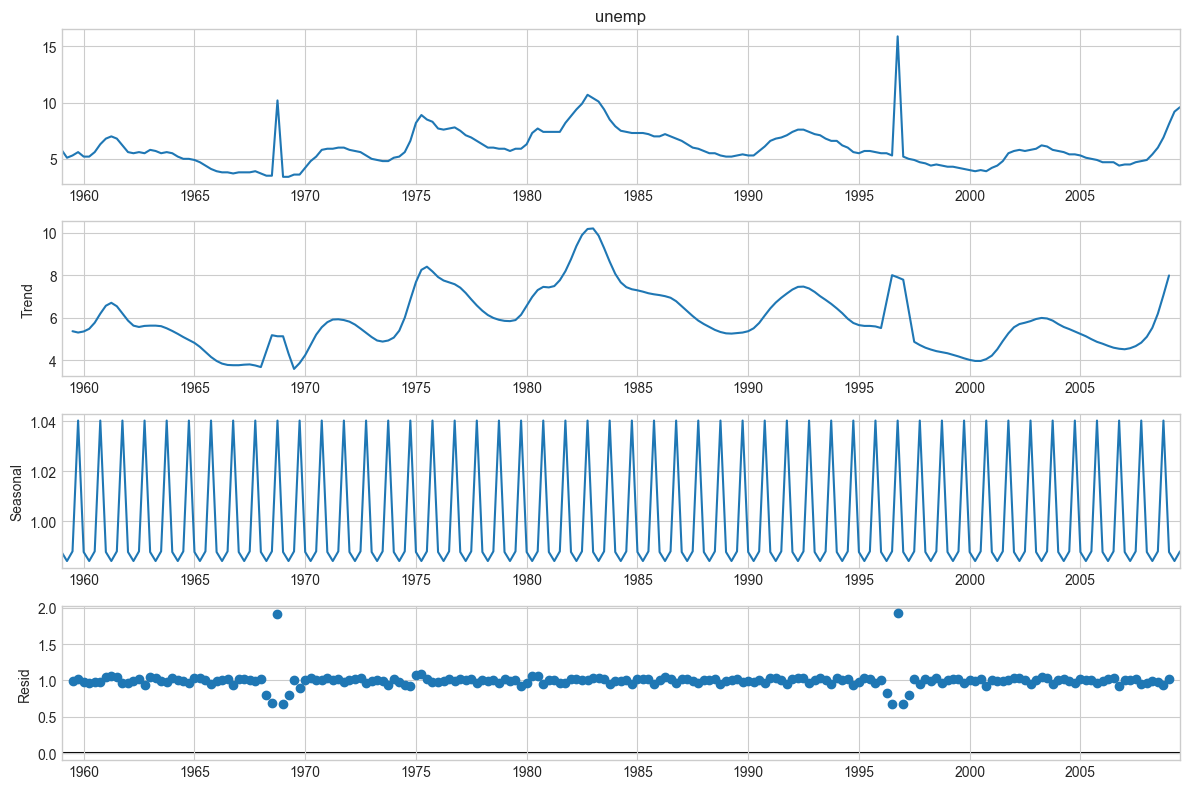

In [131]:
decomposition = sm.tsa.seasonal_decompose(df.unemp, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

## Build and evaluate time series forecast

In [132]:
## Dividing into test and train

train_len = 163
train = df[:train_len]
test = df[train_len:]

print("Train Shape : {}".format(train.shape))
print("Test Shape : {}".format(test.shape))


Train Shape : (163, 4)
Test Shape : (40, 4)


#### Naive method

In [133]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['unemp'][train_len-1]

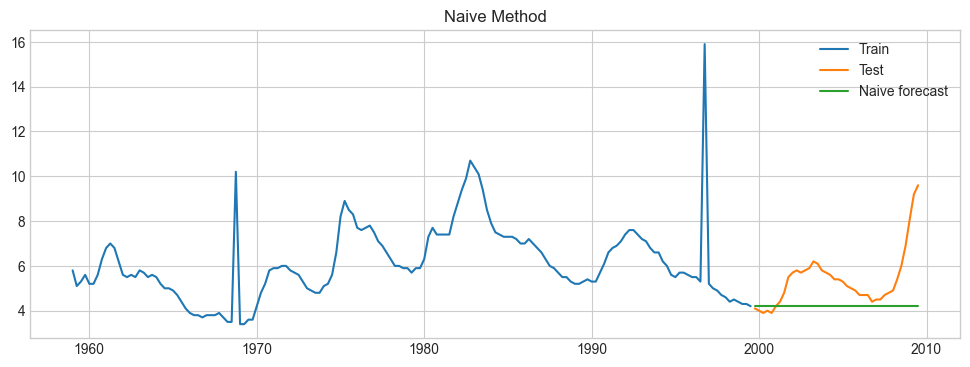

In [134]:
plt.figure(figsize=(12,4))
plt.plot(train['unemp'], label='Train')
plt.plot(test['unemp'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [135]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['unemp'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['unemp']-y_hat_naive['naive_forecast'])/test['unemp'])*100,2)
acc = 100 - mape
results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse], 'Accuracy':[acc]})
results = results[['Method', 'RMSE', 'MAPE','Accuracy']]
results

,Method,RMSE,MAPE,Accuracy
0,Naive method,1.72,19.95,80.05


#### Simple Average Method

In [136]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['unemp'].mean()

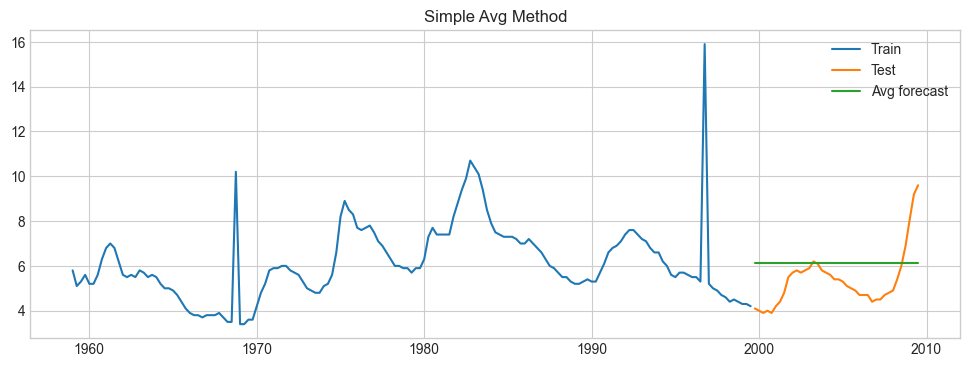

In [137]:
plt.figure(figsize=(12,4))
plt.plot(train['unemp'], label='Train')
plt.plot(test['unemp'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Avg forecast')
plt.legend(loc='best')
plt.title('Simple Avg Method')
plt.show()

In [138]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['unemp'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['unemp']-y_hat_avg['avg_forecast'])/test['unemp'])*100,2)
acc = 100 - mape
temp_results = pd.DataFrame({'Method':['Simple Avg method'], 'MAPE': [mape], 'RMSE': [rmse], 'Accuracy':[acc]})
results = pd.concat([results,temp_results])
results = results[['Method', 'RMSE', 'MAPE','Accuracy']]
results

,Method,RMSE,MAPE,Accuracy
0,Naive method,1.72,19.95,80.05
0,Simple Avg method,1.45,23.93,76.07


#### Simple Moving Average

In [139]:
y_hat_sma = df.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = df['unemp'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

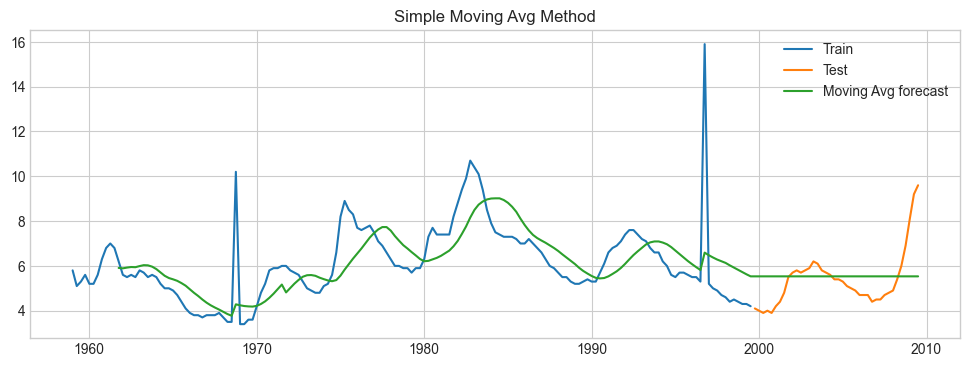

In [140]:
plt.figure(figsize=(12,4))
plt.plot(train['unemp'], label='Train')
plt.plot(test['unemp'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Moving Avg forecast')
plt.legend(loc='best')
plt.title('Simple Moving Avg Method')
plt.show()

In [141]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['unemp'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['unemp']-y_hat_sma['sma_forecast'][train_len:])/test['unemp'])*100,2)
acc = 100 - mape
temp_results = pd.DataFrame({'Method':['Simple Moving Avg method'], 'MAPE': [mape], 'RMSE': [rmse], 'Accuracy':[acc]})
results = pd.concat([results,temp_results])
results = results[['Method', 'RMSE', 'MAPE','Accuracy']]
results

,Method,RMSE,MAPE,Accuracy
0,Naive method,1.72,19.95,80.05
0,Simple Avg method,1.45,23.93,76.07
0,Simple Moving Avg method,1.26,16.87,83.13


#### Simple exponential smoothing

In [142]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['unemp'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params

y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))

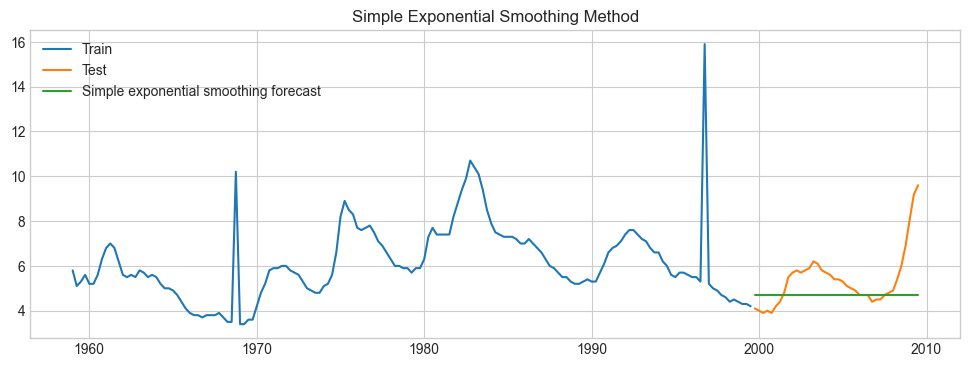

In [143]:
plt.figure(figsize=(12,4))
plt.plot(train['unemp'], label='Train')
plt.plot(test['unemp'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [144]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['unemp'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['unemp']-y_hat_ses['ses_forecast'])/test['unemp'])*100,2)
acc = 100 - mape
temp_results = pd.DataFrame({'Method':['Simple Exponential Smoothing method'], 'MAPE': [mape], 'RMSE': [rmse], 'Accuracy':[acc]})
results = pd.concat([results,temp_results])
results = results[['Method', 'RMSE', 'MAPE','Accuracy']]
results

,Method,RMSE,MAPE,Accuracy
0,Naive method,1.72,19.95,80.05
0,Simple Avg method,1.45,23.93,76.07
0,Simple Moving Avg method,1.26,16.87,83.13
0,Simple Exponential Smoothing method,1.43,15.13,84.87


#### Holt's Method

In [145]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['unemp']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)

y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 4.866666666666665, 'initial_trend': 0.16787878787878807, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


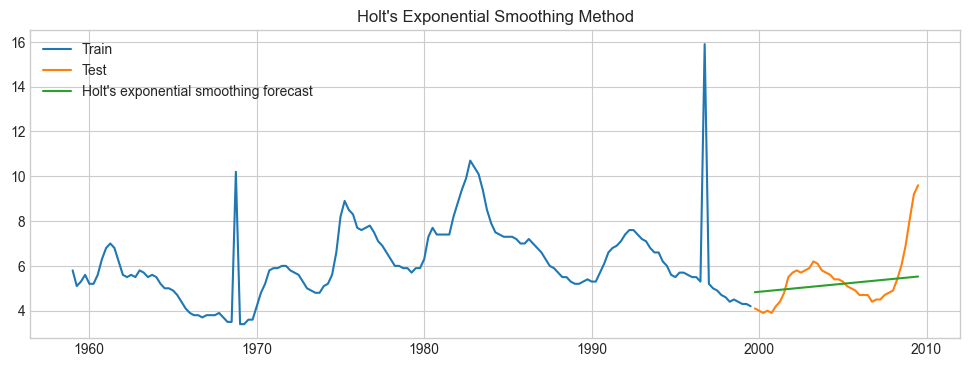

In [146]:
plt.figure(figsize=(12,4))
plt.plot( train['unemp'], label='Train')
plt.plot(test['unemp'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [147]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['unemp'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['unemp']-y_hat_holt['holt_forecast'])/test['unemp'])*100,2)
acc = 100 - mape
temp_results = pd.DataFrame({'Method':['Holt\'s method'], 'MAPE': [mape], 'RMSE': [rmse], 'Accuracy':[acc]})
results = pd.concat([results,temp_results])
results = results[['Method', 'RMSE', 'MAPE','Accuracy']]
results

,Method,RMSE,MAPE,Accuracy
0,Naive method,1.72,19.95,80.05
0,Simple Avg method,1.45,23.93,76.07
0,Simple Moving Avg method,1.26,16.87,83.13
0,Simple Exponential Smoothing method,1.43,15.13,84.87
0,Holt's method,1.18,14.68,85.32


#### Holt Winter's additive method

In [148]:
model = ExponentialSmoothing(np.asarray(train['unemp']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)

y_hat_hwa = test.copy()
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.43815449988407057, 'smoothing_trend': 1.8091813284706196e-10, 'smoothing_seasonal': 7.578856226573651e-10, 'damping_trend': nan, 'initial_level': 5.582589458609846, 'initial_trend': -0.006760838993946543, 'initial_seasons': array([-0.07089891, -0.09269935, -0.08594097,  0.32080626, -0.19384685,
       -0.23709286, -0.2803398 ,  0.61103282, -0.12066625, -0.10618274,
       -0.06866956, -0.04650832]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


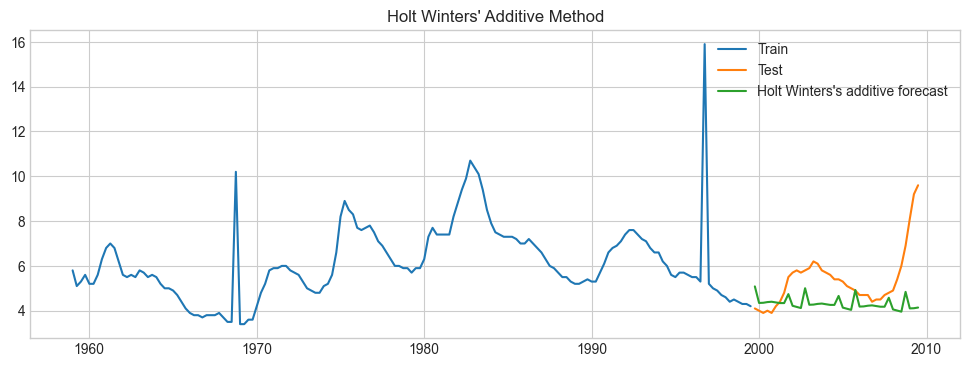

In [149]:
plt.figure(figsize=(12,4))
plt.plot( train['unemp'], label='Train')
plt.plot(test['unemp'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [150]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['unemp'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['unemp']-y_hat_hwa['hw_forecast'])/test['unemp'])*100,2)
acc = 100 - mape
temp_results = pd.DataFrame({'Method':['Holt Winters\' Additive Method'], 'MAPE': [mape], 'RMSE': [rmse], 'Accuracy':[acc]})
results = pd.concat([results,temp_results])
results = results[['Method', 'RMSE', 'MAPE','Accuracy']]
results

,Method,RMSE,MAPE,Accuracy
0,Naive method,1.72,19.95,80.05
0,Simple Avg method,1.45,23.93,76.07
0,Simple Moving Avg method,1.26,16.87,83.13
0,Simple Exponential Smoothing method,1.43,15.13,84.87
0,Holt's method,1.18,14.68,85.32
0,Holt Winters' Additive Method,1.70,19.59,80.41


#### Holt Winter's additive method

In [151]:
model = ExponentialSmoothing(np.asarray(train['unemp']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)

y_hat_hwm = test.copy()
y_hat_hwm['hwm_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.47563302172446675, 'smoothing_trend': 0.0, 'smoothing_seasonal': 2.3747510535372205e-12, 'damping_trend': nan, 'initial_level': 3.013715099974992, 'initial_trend': -0.004163297041716359, 'initial_seasons': array([1.83580091, 1.83614295, 1.83348267, 1.90147568, 1.7647432 ,
       1.77464623, 1.76904257, 2.04889733, 1.75379842, 1.78680826,
       1.81579718, 1.83793035]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


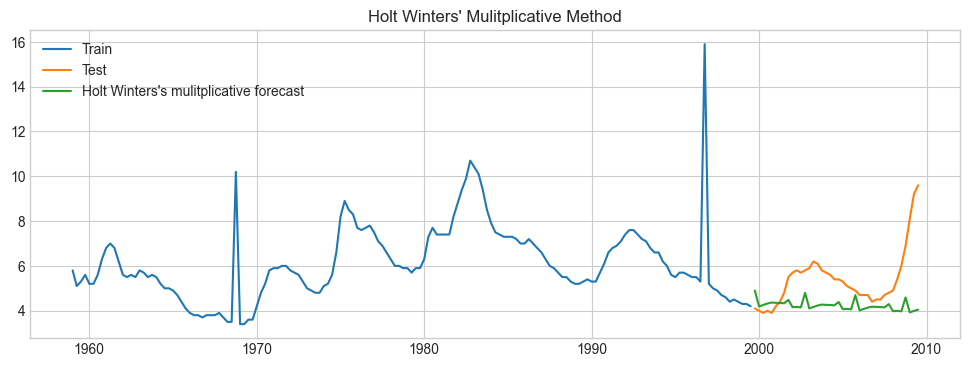

In [152]:
plt.figure(figsize=(12,4))
plt.plot( train['unemp'], label='Train')
plt.plot(test['unemp'], label='Test')
plt.plot(y_hat_hwm['hwm_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [153]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['unemp'], y_hat_hwm['hwm_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['unemp']-y_hat_hwm['hwm_forecast'])/test['unemp'])*100,2)
acc = 100 - mape
temp_results = pd.DataFrame({'Method':['Holt Winters\' Mulitplicative Method'], 'MAPE': [mape], 'RMSE': [rmse], 'Accuracy':[acc]})
results = pd.concat([results,temp_results])
results = results[['Method', 'RMSE', 'MAPE','Accuracy']]
results

,Method,RMSE,MAPE,Accuracy
0,Naive method,1.72,19.95,80.05
0,Simple Avg method,1.45,23.93,76.07
0,Simple Moving Avg method,1.26,16.87,83.13
0,Simple Exponential Smoothing method,1.43,15.13,84.87
0,Holt's method,1.18,14.68,85.32
0,Holt Winters' Additive Method,1.70,19.59,80.41
0,Holt Winters' Mulitplicative Method,1.76,20.55,79.45


### Auto Regressive methods

#### Augmented Dickey-Fuller (ADF) test

In [154]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['unemp'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.086359
Critical Values @ 0.05: -2.88
p-value: 0.027579


#### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [155]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df['unemp'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.252458
Critical Values @ 0.05: 0.46
p-value: 0.100000


#### Box Cox transformation to make variance constant

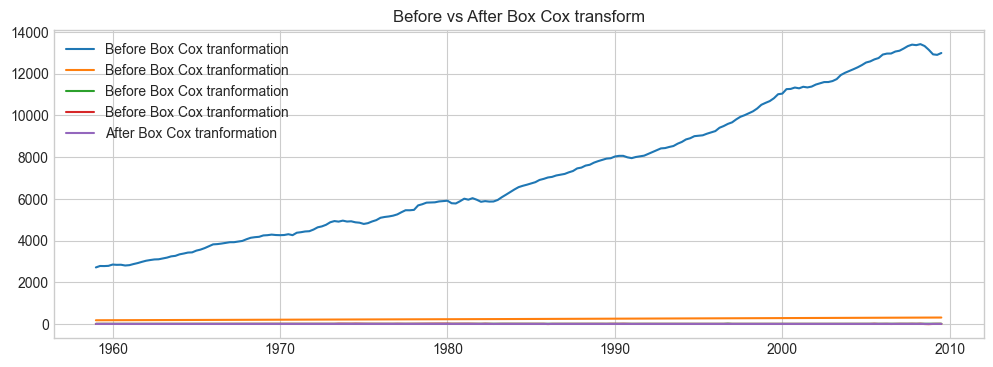

In [156]:
from scipy.stats import boxcox
df_boxcox = pd.Series(boxcox(df['unemp'], lmbda=0), index = df.index)

plt.figure(figsize=(12,4))
plt.plot(df, label='Before Box Cox tranformation')
plt.plot(df_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('Before vs After Box Cox transform')
plt.show()

#### Differencing to remove trend

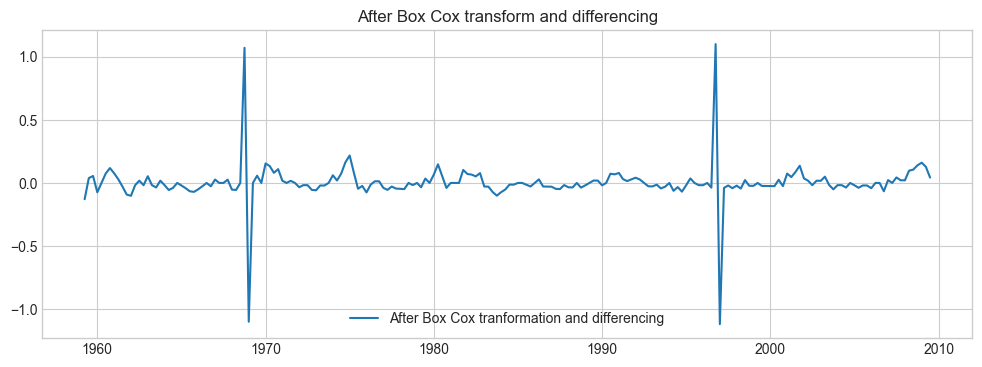

In [157]:
df_boxcox_diff = pd.Series(df_boxcox - df_boxcox.shift(), df.index)
plt.figure(figsize=(12,4))
plt.plot(df_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [158]:
df_boxcox_diff.dropna(inplace=True)

In [159]:
df_boxcox_diff.tail()

Period
2008-07-01    0.105361
2008-10-01    0.139762
2009-01-01    0.160343
2009-04-01    0.127339
2009-07-01    0.042560
dtype: float64

#### Augmented Dickey-Fuller (ADF) test

In [160]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -13.478719
Critical Values @ 0.05: -2.88
p-value: 0.000000


#### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [161]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.067886
Critical Values @ 0.05: 0.46
p-value: 0.100000


Clearly the time series is now stationary

#### Autocorrelation function (ACF)

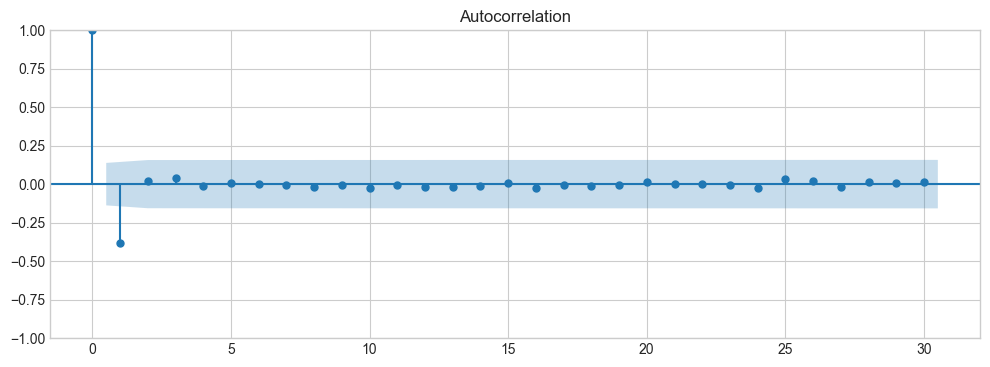

In [162]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(df_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

#### Partial autocorrelation function (PACF)

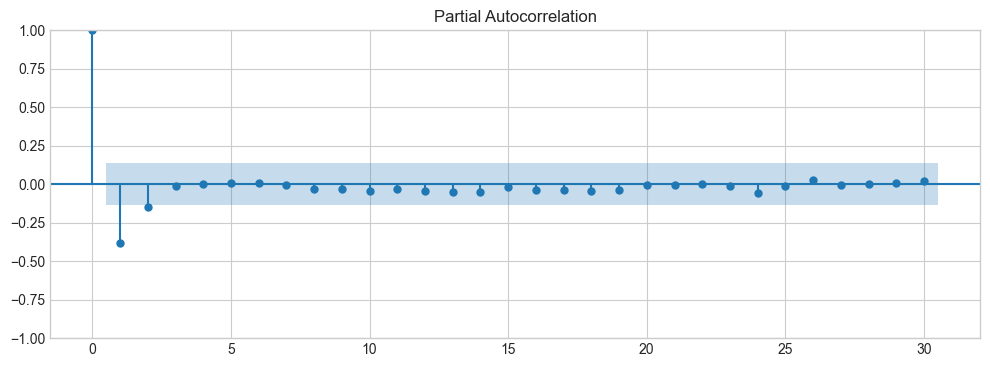

In [163]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(df_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

In [164]:
train_boxcox = df_boxcox[:train_len]
test_boxcox = df_boxcox[train_len:]
train_boxcox_diff = df_boxcox_diff[:train_len-1]
test_boxcox_diff = df_boxcox_diff[train_len-1:]

#### Auto regression method (AR)

In [165]:


import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(train_boxcox_diff, order=(12,0,0))
model_fit = model.fit()
print(model_fit.params)

const    -0.001365
ar.L1    -0.510916
ar.L2    -0.244580
ar.L3    -0.096065
ar.L4    -0.063407
ar.L5    -0.042858
ar.L6    -0.036971
ar.L7    -0.048461
ar.L8    -0.067184
ar.L9    -0.069141
ar.L10   -0.084325
ar.L11   -0.083560
ar.L12   -0.063161
sigma2    0.025509
dtype: float64


In [166]:
y_hat_ar = df_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(df_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

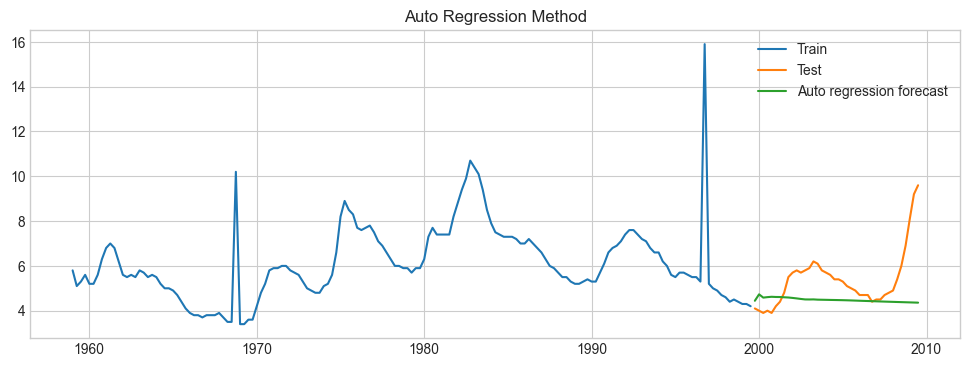

In [167]:
plt.figure(figsize=(12,4))
plt.plot(train['unemp'], label='Train')
plt.plot(test['unemp'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [168]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['unemp'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['unemp']-y_hat_ar['ar_forecast'][test.index.min():])/test['unemp'])*100,2)
acc = 100 - mape
temp_results = pd.DataFrame({'Method':['Auto Regression Method'], 'MAPE': [mape], 'RMSE': [rmse], 'Accuracy':[acc]})
results = pd.concat([results,temp_results])
results = results[['Method', 'RMSE', 'MAPE','Accuracy']]
results

,Method,RMSE,MAPE,Accuracy
0,Naive method,1.72,19.95,80.05
0,Simple Avg method,1.45,23.93,76.07
0,Simple Moving Avg method,1.26,16.87,83.13
0,Simple Exponential Smoothing method,1.43,15.13,84.87
0,Holt's method,1.18,14.68,85.32
0,Holt Winters' Additive Method,1.70,19.59,80.41
0,Holt Winters' Mulitplicative Method,1.76,20.55,79.45
0,Auto Regression Method,1.58,17.57,82.43


In [169]:
y_hat_ar.head(21)

Period
1959-04-01 00:00:00   -0.128617
1959-07-01 00:00:00    0.038466
1959-10-01 00:00:00     0.05506
1960-01-01 00:00:00   -0.074108
1960-04-01 00:00:00         0.0
1960-07-01 00:00:00    0.074108
1960-10-01 00:00:00    0.117783
1961-01-01 00:00:00    0.076373
1961-04-01 00:00:00    0.028988
1961-07-01 00:00:00   -0.028988
1961-10-01 00:00:00   -0.092373
1962-01-01 00:00:00   -0.101783
1962-04-01 00:00:00   -0.018019
1962-07-01 00:00:00    0.018019
1962-10-01 00:00:00   -0.018019
1963-01-01 00:00:00     0.05311
1963-04-01 00:00:00   -0.017392
1963-07-01 00:00:00   -0.035718
1963-10-01 00:00:00    0.018019
1964-01-01 00:00:00   -0.018019
1964-04-01 00:00:00   -0.056089
dtype: object

#### Moving average method (MA)

In [170]:
model = sm.tsa.arima.ARIMA(train_boxcox_diff, order=(0, 0, 5)) 
model_fit = model.fit()
print(model_fit.params)

const    -0.001580
ma.L1    -0.505461
ma.L2     0.015076
ma.L3     0.017969
ma.L4    -0.029667
ma.L5    -0.023291
sigma2    0.025718
dtype: float64


In [171]:
y_hat_ma = df_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(df_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

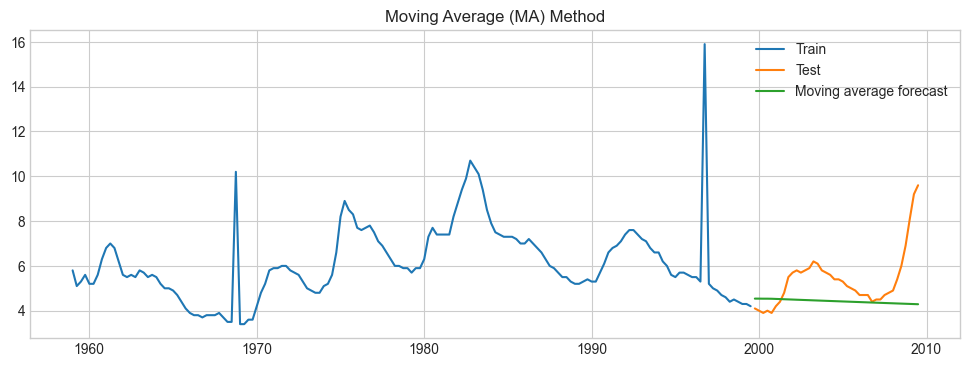

In [172]:
plt.figure(figsize=(12,4))
plt.plot(df['unemp'][:train_len], label='Train')
plt.plot(df['unemp'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average (MA) Method')
plt.show()

In [173]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['unemp'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['unemp']-y_hat_ma['ma_forecast'][test.index.min():])/test['unemp'])*100,2)
acc = 100 - mape
temp_results = pd.DataFrame({'Method':['Moving Average (MA) Method'], 'MAPE': [mape], 'RMSE': [rmse], 'Accuracy':[acc]})
results = pd.concat([results,temp_results])
results = results[['Method', 'RMSE', 'MAPE','Accuracy']]
results

,Method,RMSE,MAPE,Accuracy
0,Naive method,1.72,19.95,80.05
0,Simple Avg method,1.45,23.93,76.07
0,Simple Moving Avg method,1.26,16.87,83.13
0,Simple Exponential Smoothing method,1.43,15.13,84.87
0,Holt's method,1.18,14.68,85.32
0,Holt Winters' Additive Method,1.70,19.59,80.41
0,Holt Winters' Mulitplicative Method,1.76,20.55,79.45
0,Auto Regression Method,1.58,17.57,82.43
0,Moving Average (MA) Method,1.61,18.12,81.88


In [174]:
y_hat_ma.head(10)

Period
1959-04-01 00:00:00   -0.128617
1959-07-01 00:00:00    0.038466
1959-10-01 00:00:00     0.05506
1960-01-01 00:00:00   -0.074108
1960-04-01 00:00:00         0.0
1960-07-01 00:00:00    0.074108
1960-10-01 00:00:00    0.117783
1961-01-01 00:00:00    0.076373
1961-04-01 00:00:00    0.028988
1961-07-01 00:00:00   -0.028988
dtype: object

#### Auto regressive integrated moving average (ARIMA)

In [175]:
model = sm.tsa.arima.ARIMA(train_boxcox, order=(12, 1, 5))
model_fit = model.fit()
print(model_fit.params)

ar.L1    -0.994655
ar.L2    -0.347267
ar.L3     0.094046
ar.L4     0.515875
ar.L5     0.729814
ar.L6     0.336106
ar.L7     0.115397
ar.L8    -0.001116
ar.L9    -0.025525
ar.L10   -0.032301
ar.L11   -0.019293
ar.L12   -0.000412
ma.L1     0.457748
ma.L2    -0.179983
ma.L3    -0.267076
ma.L4    -0.500122
ma.L5    -0.506274
sigma2    0.024973
dtype: float64


In [176]:
y_hat_arima = df_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(df_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

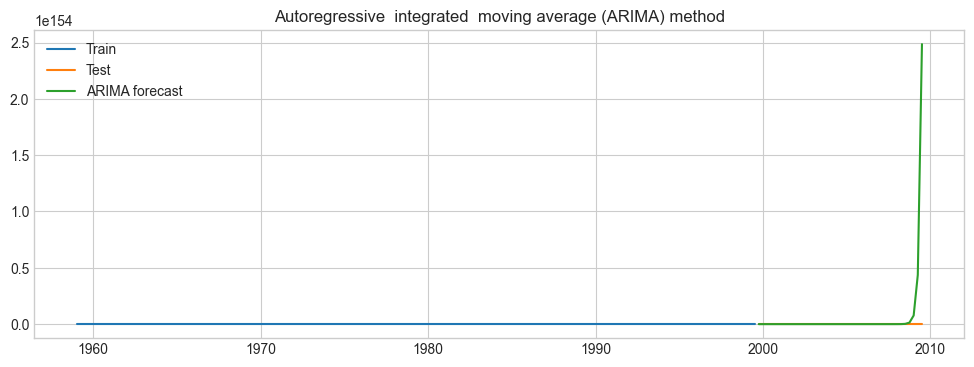

In [177]:
plt.figure(figsize=(12,4))
plt.plot(train['unemp'], label='Train')
plt.plot(test['unemp'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive  integrated  moving average (ARIMA) method')
plt.show()

In [178]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['unemp'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['unemp']-y_hat_arima['arima_forecast'][test.index.min():])/test['unemp'])*100,2)
acc = 100 - mape
temp_results = pd.DataFrame({'Method':['Autoregressive  integrated  moving average (ARIMA) Method'], 'MAPE': [mape], 'RMSE': [rmse], 'Accuracy':[acc]})
results = pd.concat([results,temp_results])
results = results[['Method', 'RMSE', 'MAPE','Accuracy']]
results

,Method,RMSE,MAPE,Accuracy
0,Naive method,1.72,1.995000e+01,8.005000e+01
0,Simple Avg method,1.45,2.393000e+01,7.607000e+01
0,Simple Moving Avg method,1.26,1.687000e+01,8.313000e+01
0,Simple Exponential Smoothing method,1.43,1.513000e+01,8.487000e+01
0,Holt's method,1.18,1.468000e+01,8.532000e+01
0,Holt Winters' Additive Method,1.70,1.959000e+01,8.041000e+01
0,Holt Winters' Mulitplicative Method,1.76,2.055000e+01,7.945000e+01
0,Auto Regression Method,1.58,1.757000e+01,8.243000e+01
0,Moving Average (MA) Method,1.61,1.812000e+01,8.188000e+01
0,Autoregressive integrated moving average (AR...,inf,7.958752e+153,-7.958752e+153


#### Seasonal auto regressive  integrated  moving average (SARIMA)

In [179]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_boxcox, order=(2, 1, 4), seasonal_order=(2, 1, 4, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.013212
ar.L2       0.782871
ma.L1      -0.486006
ma.L2      -0.766148
ma.L3       0.405213
ma.L4      -0.087136
ar.S.L12    0.004752
ar.S.L24    0.994889
ma.S.L12   -0.964580
ma.S.L24   -1.031464
ma.S.L36    0.964546
ma.S.L48    0.031502
sigma2      0.025845
dtype: float64


In [180]:
y_hat_sarima = df_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox_val'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast_val'] = np.exp(y_hat_sarima['sarima_forecast_boxcox_val'])

In [181]:
y_hat_sarima['sarima_forecast_val']

1959-04-01    5.800000
1959-07-01    5.100000
1959-10-01    5.300000
1960-01-01    5.600000
1960-04-01    5.200000
                ...   
2008-07-01    4.691621
2008-10-01    5.164902
2009-01-01    4.835048
2009-04-01    4.835160
2009-07-01    4.861190
Freq: QS-OCT, Name: predicted_mean, Length: 202, dtype: float64

# Predict test

In [182]:
y_test = pd.DataFrame()

y_test['Period']=['2009-10-01', 
                '2010-01-01', '2010-04-01', '2010-07-01', '2010-10-01',
                '2011-01-01', '2011-04-01','2011-07-01', '2011-10-01',
                '2012-01-01', '2012-04-01','2012-07-01', '2012-10-01',
                '2013-01-01', '2013-04-01','2013-07-01', '2013-10-01']
y_test['unemp']=0
y_test= y_test.set_index('Period')


In [183]:
y_hat_sarima['sarima_forecast_boxcox_test'] = model_fit.predict(y_test.index.min(), y_test.index.max())
y_hat_sarima['sarima_forecast_test'] = np.exp(y_hat_sarima['sarima_forecast_boxcox_test'])

In [184]:
y_hat_sarima['sarima_forecast_test']

2009-10-01    4.854748
2010-01-01    4.838797
2010-04-01    4.792621
2010-07-01    4.814323
2010-10-01    5.131200
2011-01-01    4.714398
2011-04-01    4.666945
2011-07-01    4.652485
2011-10-01    5.147524
2012-01-01    4.792622
2012-04-01    4.791865
2012-07-01    4.813252
2012-10-01    4.803138
2013-01-01    4.787248
2013-04-01    4.749449
2013-07-01    4.775005
2013-10-01    5.120526
Freq: QS-OCT, Name: predicted_mean, dtype: float64

In [190]:
y_test['unemp']=y_hat_sarima['sarima_forecast_test']
y_test

,unemp
Period,
2009-10-01,4.854748
2010-01-01,4.838797
2010-04-01,4.792621
2010-07-01,4.814323
2010-10-01,5.131200
2011-01-01,4.714398
2011-04-01,4.666945
2011-07-01,4.652485
2011-10-01,5.147524


In [234]:
len(y_test)

17

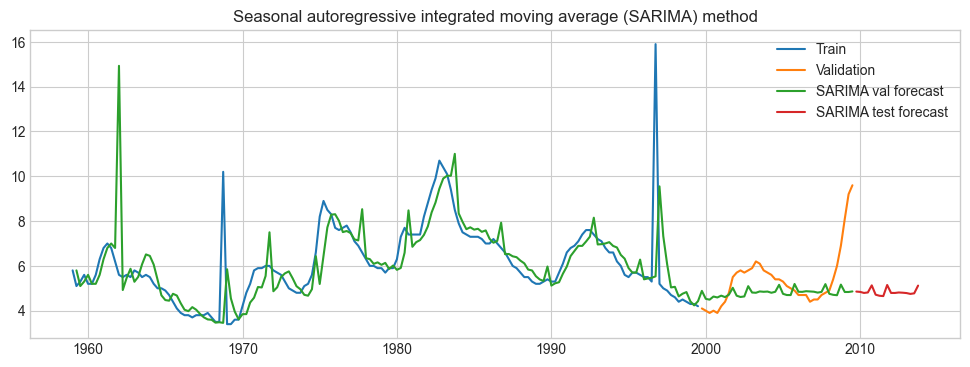

In [185]:
plt.figure(figsize=(12,4))
plt.plot(train['unemp'], label='Train')
plt.plot(test['unemp'], label='Validation')
plt.plot(y_hat_sarima['sarima_forecast_val'], label='SARIMA val forecast')
plt.plot(y_hat_sarima['sarima_forecast_test'], label='SARIMA test forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [188]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['unemp'], y_hat_sarima['sarima_forecast_val'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['unemp']-y_hat_sarima['sarima_forecast_val'][test.index.min():])/test['unemp'])*100,2)
acc = 100 - mape
temp_results = pd.DataFrame({'Method':['Seasonal Autoregressive integunempd moving average (SARIMA) Method'], 'MAPE': [mape], 'RMSE': [rmse], 'Accuracy':[acc]})
results = pd.concat([results,temp_results])
results = results[['Method', 'RMSE', 'MAPE','Accuracy']]
results

,Method,RMSE,MAPE,Accuracy
0,Naive method,1.72,1.995000e+01,8.005000e+01
0,Simple Avg method,1.45,2.393000e+01,7.607000e+01
0,Simple Moving Avg method,1.26,1.687000e+01,8.313000e+01
0,Simple Exponential Smoothing method,1.43,1.513000e+01,8.487000e+01
0,Holt's method,1.18,1.468000e+01,8.532000e+01
0,Holt Winters' Additive Method,1.70,1.959000e+01,8.041000e+01
0,Holt Winters' Mulitplicative Method,1.76,2.055000e+01,7.945000e+01
0,Auto Regression Method,1.58,1.757000e+01,8.243000e+01
0,Moving Average (MA) Method,1.61,1.812000e+01,8.188000e+01
0,Autoregressive integrated moving average (AR...,inf,7.958752e+153,-7.958752e+153


As because need to calculate count of people which are were unemployed in 2013 year, need to use population eople, so firstly will predict it by Linear regression


In [192]:
df

,realgdp,pop,unemp,infl
Period,,,,
1959-01-01,2710.349,177.146,5.8,0.00
1959-04-01,2778.801,177.830,5.1,2.34
1959-07-01,2775.488,178.657,5.3,2.74
1959-10-01,2785.204,179.386,5.6,0.27
1960-01-01,2847.699,180.007,5.2,2.31
...,...,...,...,...
2008-07-01,13324.600,305.270,6.0,-3.16
2008-10-01,13141.920,305.952,6.9,-8.79
2009-01-01,12925.410,306.547,8.1,0.94


In [204]:
df=df.reset_index()
df

,index,Period,realgdp,pop,unemp,infl
0,0,1959-01-01,2710.349,177.146,5.8,0.00
1,1,1959-04-01,2778.801,177.830,5.1,2.34
2,2,1959-07-01,2775.488,178.657,5.3,2.74
3,3,1959-10-01,2785.204,179.386,5.6,0.27
4,4,1960-01-01,2847.699,180.007,5.2,2.31
...,...,...,...,...,...,...
198,198,2008-07-01,13324.600,305.270,6.0,-3.16
199,199,2008-10-01,13141.920,305.952,6.9,-8.79
200,200,2009-01-01,12925.410,306.547,8.1,0.94
201,201,2009-04-01,12901.504,307.226,9.2,3.37


In [242]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
X=np.arange(len(df))
X_test=np.arange(max(X)+1, max(X)+y_test.shape[0]+1)
reg.fit(X.reshape(1,-1).T, df['pop'])
prediction_reg = reg.predict(X_test.reshape(1,-1).T)


prediction_reg

array([304.47792889, 305.11276983, 305.74761077, 306.38245172,
       307.01729266, 307.6521336 , 308.28697455, 308.92181549,
       309.55665643, 310.19149737, 310.82633832, 311.46117926,
       312.0960202 , 312.73086115, 313.36570209, 314.00054303,
       314.63538398])

In [244]:
y_test['pop']=prediction_reg

In [245]:
y_test['unemployed']=0.65*y_test['pop']*y_test['unemp']/100

In [246]:
y_test

,unemp,pop,unemployed
Period,,,
2009-10-01,4.854748,304.477929,9.608063
2010-01-01,4.838797,305.112770,9.596461
2010-04-01,4.792621,305.747611,9.524661
2010-07-01,4.814323,306.382452,9.587656
2010-10-01,5.131200,307.017293,10.239886
2011-01-01,4.714398,307.652134,9.427566
2011-04-01,4.666945,308.286975,9.351930
2011-07-01,4.652485,308.921815,9.342151
2011-10-01,5.147524,309.556656,10.357426


In [247]:
count = y_test[y_test.index.str.startswith('2013')]['unemployed'].sum()
count

39.62326961524045

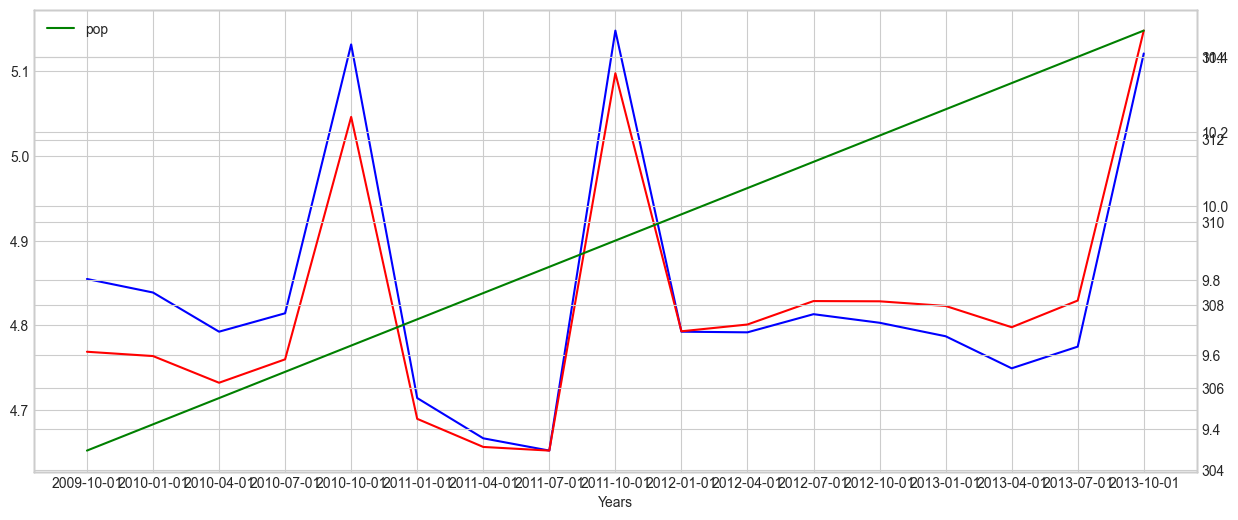

In [248]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax3 = ax.twinx()

ax.plot(y_test['unemp'], color = 'blue', label = 'unemp rate')
ax2.plot(y_test['unemployed'], color = 'red', label = 'unemployed')
ax3.plot(y_test['pop'], color = 'green', label = 'pop')
ax.set_xlabel('Years')
# ax.set_ylabel('unemp')
# ax2.set_ylabel('infl')

plt.legend(loc='best')


plt.show(block=False)

# SARIMA 2 

In [249]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_boxcox, order=(0, 1, 1), seasonal_order=(2, 1, 0, 12)) 
model_fit = model.fit()
print(model_fit.params)

ma.L1      -0.448778
ar.S.L12   -0.624057
ar.S.L24   -0.305593
sigma2      0.033769
dtype: float64


In [250]:
y_hat_sarima = df_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox_val'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast_val'] = np.exp(y_hat_sarima['sarima_forecast_boxcox_val'])

y_hat_sarima['sarima_forecast_boxcox_test'] = model_fit.predict(y_test.index.min(), y_test.index.max())
y_hat_sarima['sarima_forecast_test'] = np.exp(y_hat_sarima['sarima_forecast_boxcox_test'])

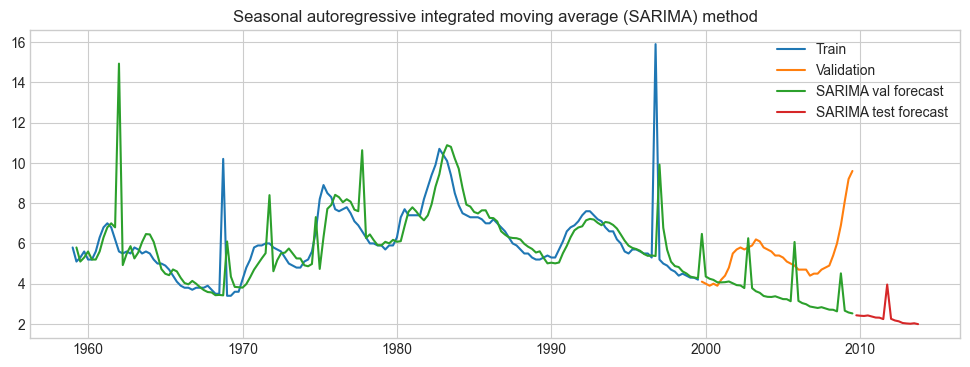

In [251]:
plt.figure(figsize=(12,4))
plt.plot(train['unemp'], label='Train')
plt.plot(test['unemp'], label='Validation')
plt.plot(y_hat_sarima['sarima_forecast_val'], label='SARIMA val forecast')
plt.plot(y_hat_sarima['sarima_forecast_test'], label='SARIMA test forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()